In [7]:
# Step 1: Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [8]:
# Step 2: Load Wine Quality Dataset from sklearn or use a CSV

data = load_wine()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

X = df
y = data.target

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
# Step 3: Split into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 4: Train a Gaussian Naive Bayes model

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [11]:
# Step 5: Predict and evaluate

y_pred = model.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



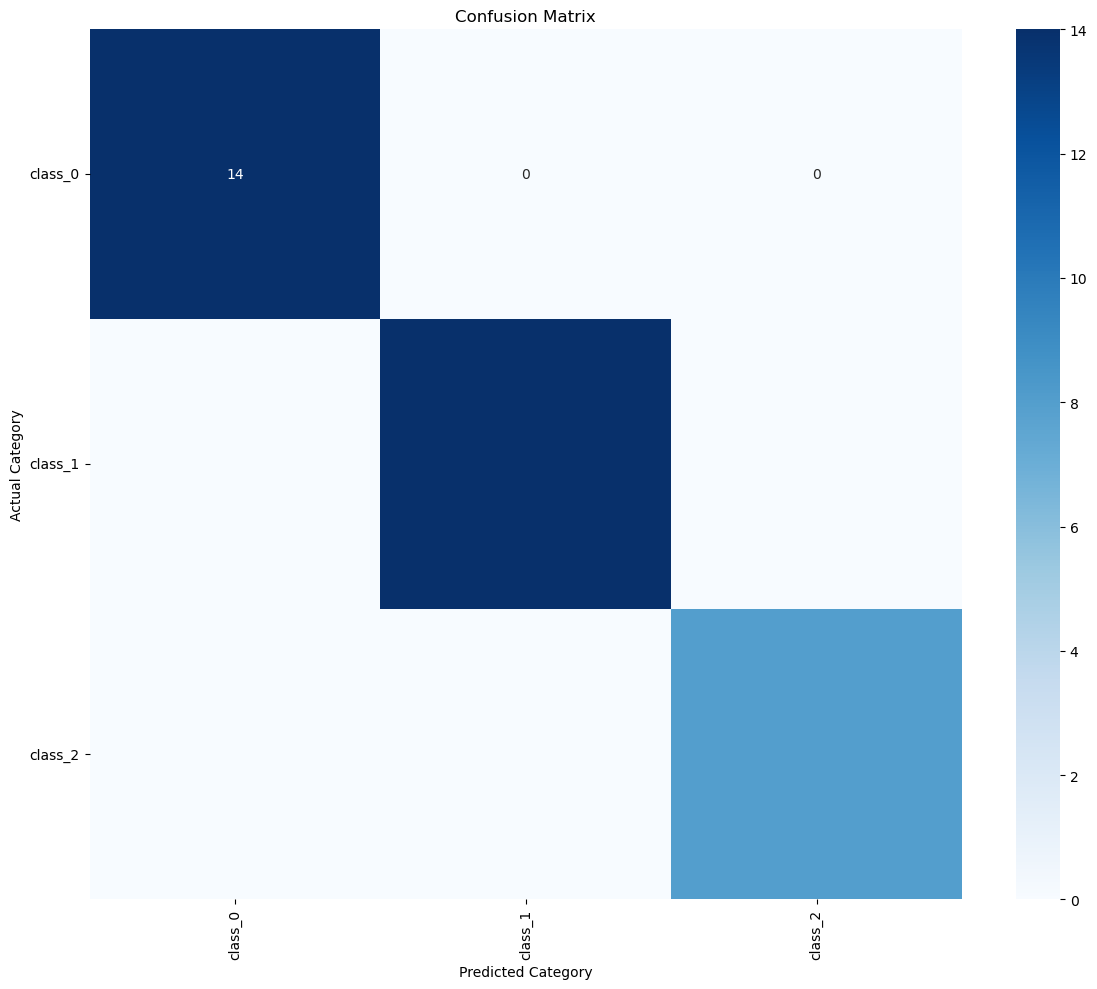

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


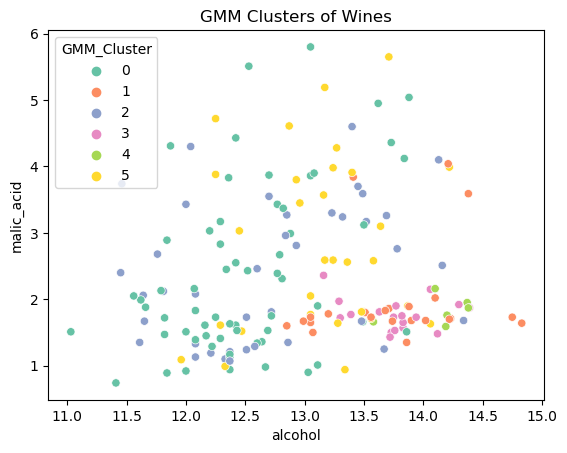

In [13]:
from sklearn.mixture import GaussianMixture

# Fit GMM assuming 6 quality levels
gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(X)

# Assign cluster labels
df['GMM_Cluster'] = gmm.predict(X)

# Visualize clusters
sns.scatterplot(data=df, x=X.columns[0], y=X.columns[1], hue='GMM_Cluster', palette='Set2')
plt.title("GMM Clusters of Wines")
plt.show()